## **Preprocessing - 실전예제**
### 공공데이터(건강진단 데이터

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 한글 폰트
from matplotlib import font_manager, rc
import sys

### 공공 데이터 읽어오기

In [6]:
df = pd.read_csv(r'./data/건강검진정보(2017).csv', encoding='utf-8')

In [7]:
df.shape

(1000000, 34)

In [8]:
df.info()
# dtypes: float64(25), int64(9)
# memory usage: 259.4 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

### **숫자 타입 바이트 수 조정하기**

In [9]:
# 자료형을 변환해서 메모리 사용량을 줄인다.
for i in df.columns:
    if df[i].dtype == np.int64:
        df[i] = df[i].astype(np.int16)
    if df[i].dtype == np.float64:
        df[i] = df[i].astype(np.float32)

### **데이터 사용 메모리 절감**

In [10]:
df.info()
# dtypes: float32(25), int16(9)
# memory usage: 112.5 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int16  
 1   가입자일련번호       1000000 non-null  int16  
 2   성별코드          1000000 non-null  int16  
 3   연령대코드(5세단위)   1000000 non-null  int16  
 4   시도코드          1000000 non-null  int16  
 5   신장(5Cm단위)     1000000 non-null  int16  
 6   체중(5Kg단위)     1000000 non-null  int16  
 7   허리둘레          999734 non-null   float32
 8   시력(좌)         999817 non-null   float32
 9   시력(우)         999811 non-null   float32
 10  청력(좌)         999842 non-null   float32
 11  청력(우)         999844 non-null   float32
 12  수축기혈압         999981 non-null   float32
 13  이완기혈압         999982 non-null   float32
 14  식전혈당(공복혈당)    999958 non-null   float32
 15  총콜레스테롤        999957 non-null   float32
 16  트리글리세라이드      999955 non-null   float32
 17  HDL콜레스테롤      999956 non-nul

## **데이터 전처리** 
### **1. null 제거**

In [11]:
# 1. null 확인 - isna/ isnull
df.isna()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False


In [12]:
df.isnull()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False


In [13]:
# null 수 확인
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

In [14]:
# null의 전체 개수
df.isna().sum().sum()

4609044

In [15]:
# 2. null 제거 및 대체 - fillna(). dropna()
df = df.fillna(0)

In [16]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,1.0,1,0.0,0.0,0.0,0.0,1.0,-3962
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,0.0,1,0.0,0.0,0.0,0.0,2.0,-3962
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,-3962
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,-3962
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,-3962


In [17]:
# 3) null 대체 후 확인
df.isna().sum().sum()

0

### **2. 피처 엔지니어링 - 피처 선택 / 새로운 피처 생성**
#### 1. 기존 컬럼 이용해서 새로운 df 생성
- 중요한 피처만 뽑아서

In [19]:
df_new = df[['성별코드', '신장(5Cm단위)']].copy()

In [20]:
df_new

,성별코드,신장(5Cm단위)
0,1,170
1,1,180
2,1,165
3,1,175
4,1,165
...,...,...
999995,1,175
999996,1,170
999997,2,155
999998,1,175


#### 2. 새로운 피처(컬럼) 추가 - count

In [21]:
df_new.loc[:, 'count'] = 1 # count 열을 추가한다.(값 1통일)

In [23]:
df_new.head()

,성별코드,신장(5Cm단위),count
0,1,170,1
1,1,180,1
2,1,165,1
3,1,175,1
4,1,165,1


In [24]:
df_new.index

RangeIndex(start=0, stop=1000000, step=1)

In [25]:
df_new['count'].count()

1000000

#### 3) pivot table 만들기

In [26]:
import numpy as np

In [27]:
df_pivot = pd.pivot_table(df_new, index=['신장(5Cm단위)'],
                          columns = ['성별코드'],
                          values = 'count',
                          aggfunc=np.sum)

In [28]:
df_pivot.head()
# 신장별로 count (1: 남, 2:여)

성별코드,1,2
신장(5Cm단위),,
130,NaN,93.0
135,NaN,1301.0
140,6.0,9273.0
145,99.0,39507.0
150,2986.0,105849.0


#### 4. null 대체

In [29]:
df_pivot = df_pivot.fillna(0)

In [30]:
df_pivot.head()

성별코드,1,2
신장(5Cm단위),,
130,0.0,93.0
135,0.0,1301.0
140,6.0,9273.0
145,99.0,39507.0
150,2986.0,105849.0


#### 3. 통계량 확인

In [31]:
df_pivot.describe()

성별코드,1,2
count,13.000000,13.000000
mean,40800.769231,36122.307692
std,56802.893131,52056.939757
min,0.000000,0.000000
25%,99.000000,93.000000
50%,6630.000000,8432.000000
75%,70336.000000,43597.000000
max,159110.000000,147717.000000


#### 4. 시각화

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

#### 1) Box 그래프

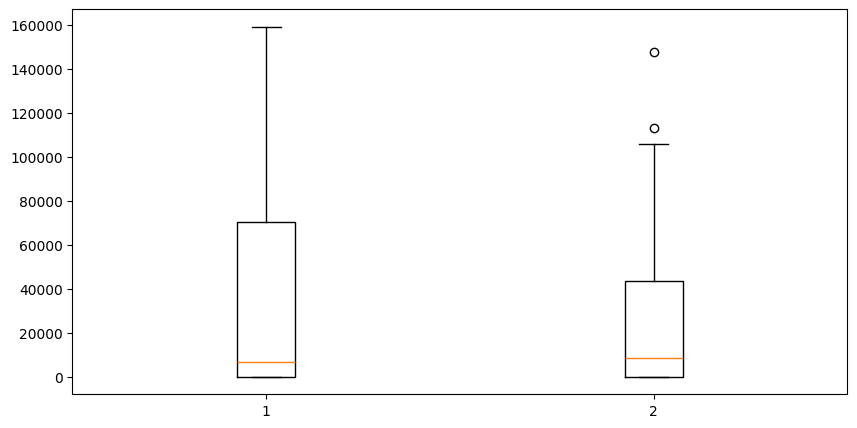

In [33]:
plt.figure(figsize=(10,5))
plt.boxplot(df_pivot)
plt.show()

#### 2) Box그래프 내의 xtick 변경하기

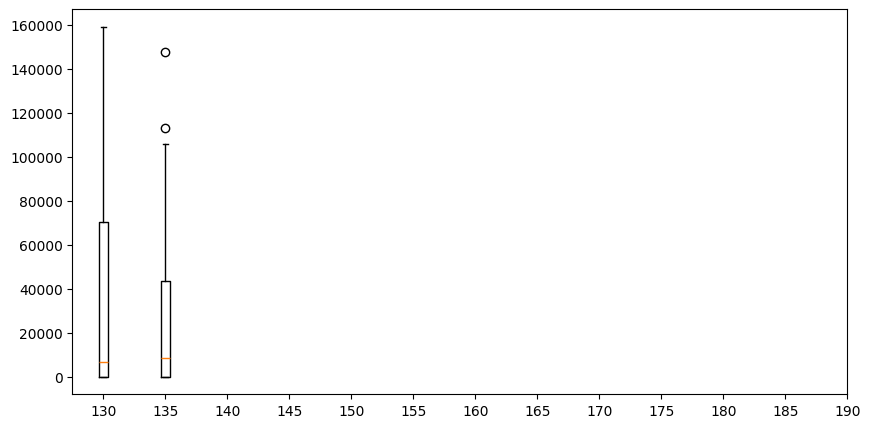

In [34]:
plt.figure(figsize=(10,5))
plt.boxplot(df_pivot)
plt.xticks([x+1 for x in range(0, df_pivot.index.shape[0])], [x for x in df_pivot.index])

plt.show()

#### 3)성별 키 분포 확인

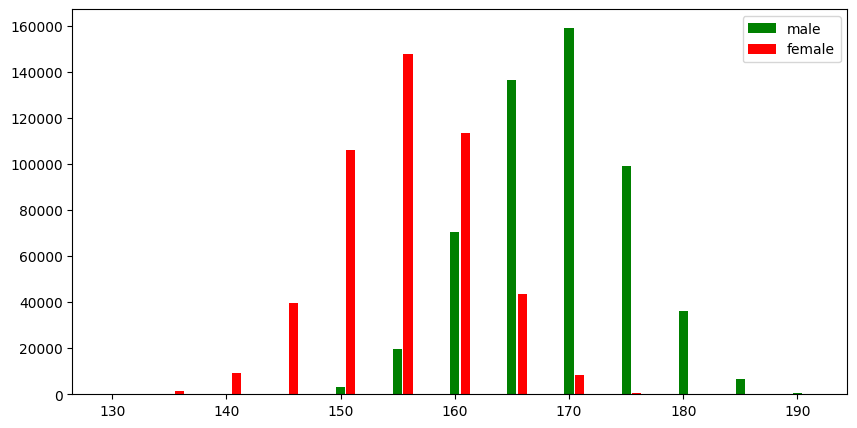

In [36]:
plt.figure(figsize=(10,5))
# 남자 여자로 구분해서 막대 그래프 그린다.
plt.bar(df_pivot.index, df_pivot[1], color='g', label='male')
plt.bar(df_pivot.index + 0.9, df_pivot[2], color='r', label='female')
plt.legend() # 범례표시

### **성별로 신장/체중 상관관계 분석**

### 1) 관심 있는 컬럼만으로 df 생성

In [37]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [38]:
# 성별, 키, 몸무게 피쳐만 가져오기
df_new2 = df[['성별코드', '신장(5Cm단위)', '체중(5Kg단위)']].copy()

In [39]:
df_new2.head()

,성별코드,신장(5Cm단위),체중(5Kg단위)
0,1,170,75
1,1,180,80
2,1,165,75
3,1,175,80
4,1,165,60


#### 2) 남 여 구분해서 df 생성

In [40]:
df_new2.loc[:, '성별코드']

0         1
1         1
2         1
3         1
4         1
         ..
999995    1
999996    1
999997    2
999998    1
999999    1
Name: 성별코드, Length: 1000000, dtype: int16

In [43]:
# 남자 df
df_male = df_new2[df_new2.loc[:, '성별코드']==1] # 성별코드1 인 애만 뽑아서 남자 df
df_male.drop('성별코드', axis=1, inplace=True) # 성별코드 컬럼 드롭
df_male.reset_index(drop=True, inplace=True)

In [44]:
df_male.head()

,신장(5Cm단위),체중(5Kg단위)
0,170,75
1,180,80
2,165,75
3,175,80
4,165,60


In [45]:
# 여자 df
df_female = df_new2[df_new2.loc[:, '성별코드']==2]
df_female.drop('성별코드', axis=1, inplace=True)
df_female.reset_index(drop=True, inplace=True)

In [46]:
df_female.head()

,신장(5Cm단위),체중(5Kg단위)
0,150,55
1,150,55
2,160,50
3,160,65
4,170,50


### 3) 상관관계 분석

In [47]:
df_male.corr()
# 대각선은 무조건 1임 (자기자신과의 상관관계니까)
# 신장 - 체중 0.53정도 양의 상관관계
# 체중이 높아지면 신장이 높다. 
# -1 <= r <= 1

,신장(5Cm단위),체중(5Kg단위)
신장(5Cm단위),1.000000,0.536038
체중(5Kg단위),0.536038,1.000000


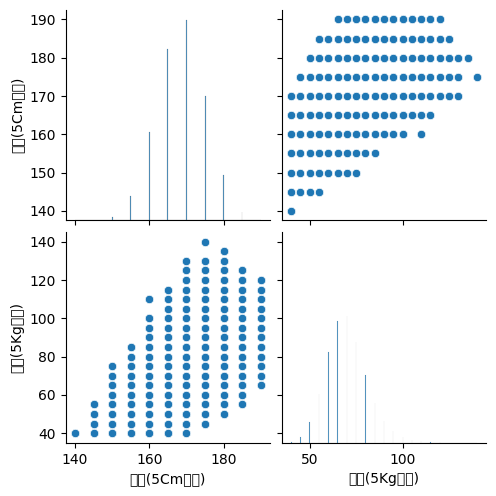

In [48]:
sns.pairplot(df_male)

In [49]:
# 체중 높은사람은 키도 높은 경향을 보인다.

In [50]:
df_female.corr()

,신장(5Cm단위),체중(5Kg단위)
신장(5Cm단위),1.00000,0.30867
체중(5Kg단위),0.30867,1.00000


In [51]:
# 여자의 경우 남자보다는 상관관계가 낮다.
# 키가 크다고 몸무게가 높지는 않다.
# 다이어트 때문..?

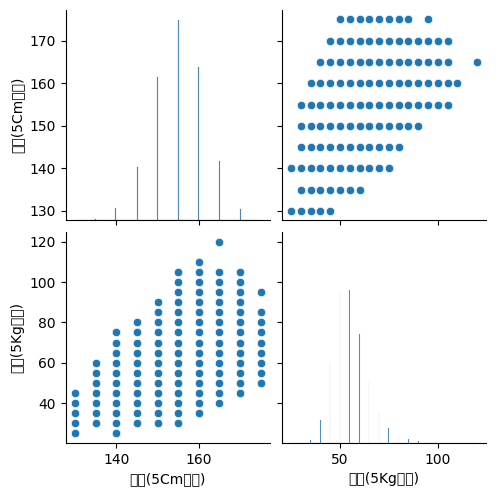

In [52]:
sns.pairplot(df_female)

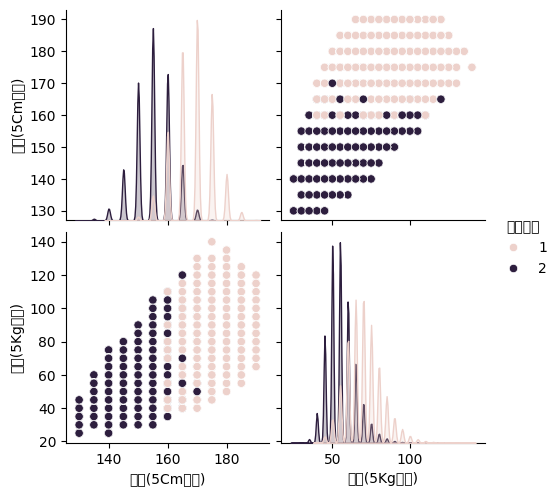

In [53]:
# 남, 여 같이 pairplot으로 보여주기
sns.pairplot(df_new2, hue='성별코드')